In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('drive/My Drive/fer2013.csv')

In [ ]:
numofinstances=len(df)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
num_classes=max(df['emotion'].tolist())
for i in range(numofinstances):
    try:
        emotion=df.loc[i]['emotion']
        pixels=df.loc[i]['pixels']
        usage=df.loc[i]['Usage']
        pixels=pixels.split(' ')
        pixels=np.array(pixels,'float32')
        emotion=tf.keras.utils.to_categorical(emotion,num_classes=num_classes+1)
        if usage.lower()=='training':
            x_train.append(pixels)
            y_train.append(emotion)
        elif usage.lower()=='publictest' or usage.lower()=='privatetest':
            x_test.append(pixels)
            y_test.append(emotion)
    except Exception as e:
        print(e)
        continue

In [ ]:
x_train=np.array(x_train,'float32')
y_train=np.array(y_train,'float32')
x_test=np.array(x_test,'float32')
y_test=np.array(y_test,'float32')
x_train/=255
x_test/=255
x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_train=x_train.astype('float32')
x_test=x_test.reshape(x_test.shape[0],48,48,1)
x_test=x_test.astype('float32')

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu',input_shape=(48,48,1))) #1st convolution layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5,5),strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) #2nd convolution layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu')) #3rd convolution layer
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(3,3),strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu')) #fully connected neural networks
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=num_classes+1,activation='softmax'))

In [ ]:
batch_size=256
gen=tf.keras.preprocessing.image.ImageDataGenerator()
train_generator=gen.flow(x_train,y_train,batch_size=batch_size)
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
for i in range(10):
    epochs=5
    model.fit(train_generator,epochs=epochs)
    train_score=model.evaluate(x_train,y_train,verbose=0)
    print('Train loss:',train_score[0])
    print('Train accuracy:',100*train_score[1])
    test_score=model.evaluate(x_test,y_test,verbose=0)
    print('Test loss:',test_score[0])
    print('Test accuracy:',100*test_score[1])

In [ ]:
def emotion_analysis(emotions):
    objects=('angry','disgust','fear','happy','sad','surprise','neutral')
    y_pos=np.arange(len(objects))
    emotion=objects[(emotions.tolist()).index(max(emotions))]
    plt.bar(y_pos,emotions,align='center',alpha=0.5)
    plt.xticks(y_pos,objects)
    plt.ylabel('percentage')
    plt.title('Emotion')
    plt.show()
    return emotion

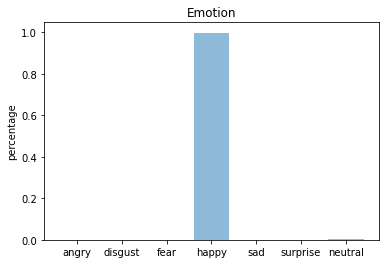

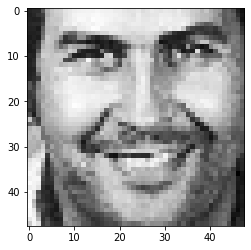

The person is happy !!!


In [ ]:
img=tf.keras.preprocessing.image.load_img('/content/drive/My Drive/pablo.png',color_mode='grayscale',target_size=(48,48))
x=tf.keras.preprocessing.image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x/=255
custom=model.predict(x)
emotion=emotion_analysis(custom[0])
plt.gray()
plt.imshow(img)
plt.show()
print('The person is',emotion,'!!!')

In [ ]:
tf.keras.models.save_model(model,'drive/My Drive/model',overwrite=True,include_optimizer=True,save_format=None,signatures=None,options=None)

INFO:tensorflow:Assets written to: drive/My Drive/model/assets
